In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('ca_san_diego_2020_04_01.csv').drop('raw_row_number', axis=1)
data

,date,time,service_area,subject_age,subject_race,subject_sex,type,arrest_made,citation_issued,warning_issued,outcome,contraband_found,search_conducted,search_person,search_vehicle,search_basis,reason_for_search,reason_for_stop,raw_action_taken,raw_subject_race_description
0,2014-01-01,01:25:00,110,24.0,white,male,vehicular,False,True,False,citation,NaN,False,False,False,NaN,NaN,Moving Violation,Citation,WHITE
1,2014-01-01,05:47:00,320,42.0,white,male,vehicular,False,False,True,warning,NaN,False,False,False,NaN,NaN,Moving Violation,Verbal Warning,WHITE
2,2014-01-01,07:46:00,320,29.0,asian/pacific islander,male,vehicular,False,False,True,warning,NaN,False,False,False,NaN,NaN,Moving Violation,Verbal Warning,LAOTIAN
3,2014-01-01,08:10:00,610,23.0,white,male,vehicular,False,True,False,citation,NaN,False,False,False,NaN,NaN,Moving Violation,Citation,WHITE
4,2014-01-01,08:35:00,930,35.0,hispanic,male,vehicular,False,True,False,citation,NaN,False,False,False,NaN,NaN,Equipment Violation,Citation,HISPANIC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383022,NaN,NaN,620,NaN,NaN,NaN,vehicular,NaN,True,True,citation,NaN,False,False,False,NaN,NaN,NA|Equipment Violation|NA|NA|NA|NA|NA|Moving V...,Verbal Warning|NA|Citation|Citation|NA|NA|NA|C...,NaN
383023,NaN,NaN,710,NaN,NaN,NaN,vehicular,NaN,True,False,citation,NaN,False,False,False,NaN,NaN,NA|Moving Violation,NA|Citation,NaN
383024,2014-12-22,NaN,720,NaN,NaN,NaN,vehicular,False,True,False,citation,NaN,False,False,False,NaN,NaN,Moving Violation,Citation,NaN
383025,NaN,NaN,810,NaN,NaN,NaN,vehicular,NaN,True,False,citation,NaN,False,False,False,NaN,NaN,Moving Violation,Citation|NA,NaN


In [4]:
data.value_counts('subject_race')

subject_race
white                     162226
hispanic                  117083
black                      42705
asian/pacific islander     32541
other                      27238
dtype: int64

In [5]:
data.value_counts('subject_sex')

subject_sex
male      248398
female    133968
dtype: int64

In [6]:
race_pct = data.value_counts('subject_race') / data.shape[0]
race_pct

subject_race
white                     0.423537
hispanic                  0.305678
black                     0.111493
asian/pacific islander    0.084957
other                     0.071112
dtype: float64

In [7]:
search_pct = data.pivot_table(index='subject_race', values='search_conducted', aggfunc='mean')
search_pct

,search_conducted
subject_race,
asian/pacific islander,0.027965
black,0.090692
hispanic,0.055525
other,0.016558
white,0.027801


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0.5, '% stopped')]

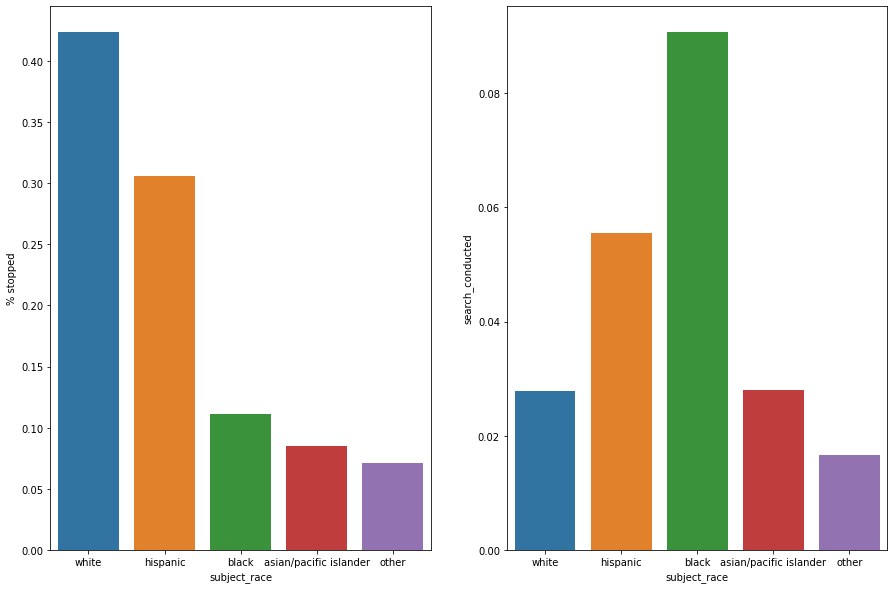

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(15, 10))
p1 = sns.barplot(race_pct.index, race_pct.values, ax=ax[0], order=['white', 'hispanic', 'black', 'asian/pacific islander', 'other'])
p2 = sns.barplot(data=search_pct, x=search_pct.index, y='search_conducted', ax=ax[1], order=['white', 'hispanic', 'black', 'asian/pacific islander', 'other'])
p1.set(ylabel='% stopped')

In [9]:
sex_search_pct = data.pivot_table(index='subject_sex', values='search_conducted', aggfunc='mean')
sex_search_pct

,search_conducted
subject_sex,
female,0.023446
male,0.052766


<AxesSubplot:xlabel='subject_sex', ylabel='search_conducted'>

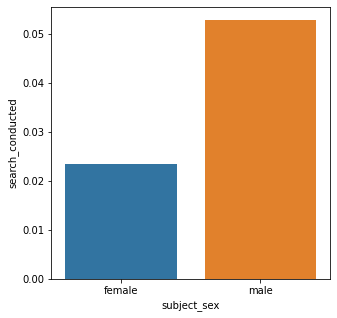

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
sns.barplot(data=sex_search_pct, x=sex_search_pct.index, y='search_conducted', ax=ax, order=['female', 'male'])

In [54]:
tmp = data[data['search_conducted'] == 1][['subject_age', 'subject_race', 'subject_sex', 'search_conducted', 'contraband_found']]
tmp['contraband_found'] = tmp['contraband_found'].convert_dtypes()
gb = tmp.groupby('subject_race')[['contraband_found']].mean()
gb

,contraband_found
subject_race,
asian/pacific islander,0.104396
black,0.093209
hispanic,0.081218
other,0.095344
white,0.114856


[Text(0, 0.5, '% contraband found')]

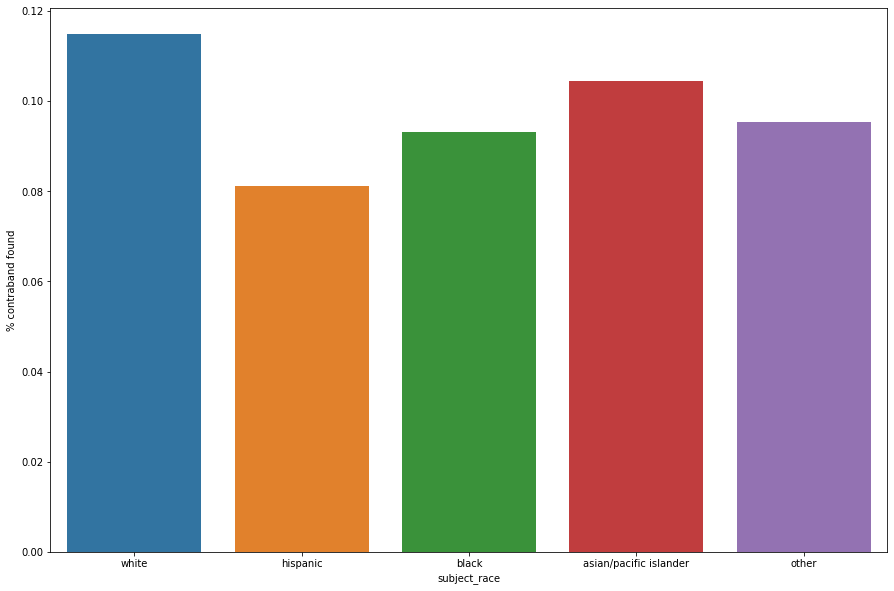

In [57]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
p3 = sns.barplot(x=gb.index, y=gb.values.flatten(), ax=ax, order=['white', 'hispanic', 'black', 'asian/pacific islander', 'other'])
p3.set(ylabel='% contraband found')